In [8]:
from matplotlib import rcParams
from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Native matplitlib font can be done liek this: rc('font',**{'family':'sans-serif','sans-serif':['NOT!Helvetica']})

# Needs to install tex-live to have helvetica and use tex to render labels
rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]  
rc('text', usetex=True)

font_size = 18
rcParams['font.size'] = font_size
rcParams['axes.labelsize'] = font_size
rcParams['xtick.labelsize'] = font_size
rcParams['ytick.labelsize'] = font_size
rcParams['legend.fontsize'] = font_size

In [33]:
# Use seaborn color palette
#import seaborn as sns
#p = sns.color_palette("Paired")
#p = sns.color_palette("muted")
#sns.set_palette(p)
C = ['darkorange', 'steelblue', 'firebrick', 'purple']

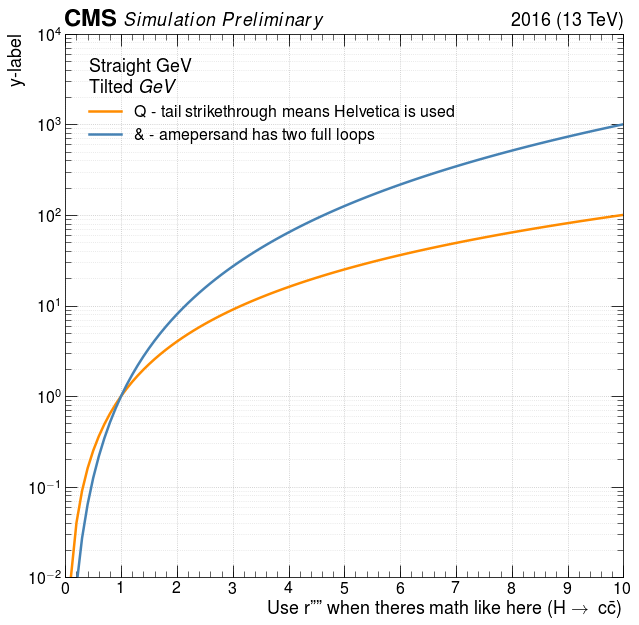

In [34]:
f, ax = plt.subplots(figsize=(10,10))

x = np.linspace(0,10,101)
y1 = x**2
y2 = x**3

ax.plot(x, y1, lw=2.5, label="Q - tail strikethrough means Helvetica is used", c=C[0])
ax.plot(x, y2, lw=2.5, label="\& - amepersand has two full loops", c=C[1])

ax.set_xlim(0,10)
ax.set_ylim(0.01,10000)
ax.set_xlabel(r'Use r"" when theres math like here ($\mathrm{H \rightarrow\ c\bar{c}}$)', ha='right', x=1.0)
ax.set_ylabel('y-label', ha='right', y=1.0)

# Legend
leg = ax.legend(borderpad=1, frameon=False, loc=2, fontsize=16,
    title = "Straight $\mathrm{GeV}$" \
          + "\n Tilted $GeV$"
    )
leg._legend_box.align = "left" # Align legend title

####################### ROOT-like CMS ticks and labels ##############################
# Sets 10 major ticks and 5 minor between each major, calling ax.semilogy() overwrites this.
import matplotlib.ticker as plticker
xl = ax.get_xlim()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=(xl[-1]-xl[0])/10))
ax.xaxis.set_minor_locator(plticker.MultipleLocator(base=(xl[-1]-xl[0])/50))
yl = ax.get_ylim()
ax.yaxis.set_major_locator(plticker.MultipleLocator(base=(yl[-1]-yl[0])/10))
ax.yaxis.set_minor_locator(plticker.MultipleLocator(base=(yl[-1]-yl[0])/50))
ax.tick_params(direction='in', axis='both', which='major', labelsize=16, length=12 )
ax.tick_params(direction='in', axis='both', which='minor', length=6)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')    
ax.grid(which='minor', alpha=0.4, axis='y', linestyle='dotted')
ax.grid(which='major', alpha=0.8, linestyle='dotted')
ax.annotate(r'2016 (13 TeV)', xy=(1, 1.015), xycoords='axes fraction', ha='right',
            annotation_clip=False)
ax.annotate('$\mathbf{CMS}$', xy=(0, 1.015), xycoords='axes fraction', ha='left',
            fontsize=24, annotation_clip=False)
ax.annotate('$Simulation\ Preliminary$', xy=(0.105, 1.015), xycoords='axes fraction', ha='left',
            fontsize=18, annotation_clip=False)
##########################################################################



ax.semilogy()
f.show()
